In [1]:
import os
os.chdir('../')

In [2]:
from src.utils.output import save_thumbnails
from src.utils.output import create_s1_rgb_composite

In [19]:
import xarray as xr
import rioxarray as rxr
import yaml
from tqdm import tqdm
from PIL import Image

In [4]:
from pathlib import Path

In [5]:
config_path = '/home/benchuser/code/config.yml'
with open(config_path, "r") as file:
    config = yaml.safe_load(file)
        
version = config['dataset']['version']
# version = 'v0.40.2'
working_dir = Path(config['directory']['working'])
output_dir = Path(config['directory']['output'])
aoi_version = config['aoi']['version']

print(yaml.dump(config))

aoi:
  exclude_indices: null
  include_indices: null
  version: v0.30
chips:
  chip_size: 960
  sample_size: 960
dataset:
  version: v0.40.7
dem:
  collection: cop-dem-glo-30
  dtype: float32
  fill_na: false
  na_value: -999
  native_crs: false
  resolution: 30
  year: 2021-01-02/2021-12-31
directory:
  output: /home/benchuser/final_data
  working: /home/benchuser/data
land_cover:
  collection: io-lulc-annual-v02
  dtype: int8
  fill_na: false
  na_value: 0
  native_crs: false
  resolution: 10
  sampling_factor: null
  year: 2023-01-02/2023-12-31
landsat:
  bands:
  - coastal
  - blue
  - green
  - red
  - nir08
  - swir16
  - swir22
  - qa_pixel
  cloud_band: qa_pixel
  cloud_cover: 100
  collection: landsat-c2-l2
  delta_days: 91
  dtype: float32
  fill_na: false
  na_value: -999
  native_crs: false
  platforms:
  - landsat-8
  - landsat-9
  resolution: 30
log_errors: true
sentinel_1:
  bands:
  - vv
  - vh
  collection: sentinel-1-rtc
  delta_days: 12
  dtype: float32
  fill_na: fa

In [ ]:

# Convert the glob generator to a list to get the total count for the progress bar
s1_files = list((working_dir / version).glob('*sentinel_1*'))

for path in tqdm(s1_files, desc="Generating S1 Thumbnails"):
    s1_array = rxr.open_rasterio(path)
    
    # Use the composite function to create a proper RGB image
    rgb_8bit = create_s1_rgb_composite(s1_array)
    
    pil_img = Image.fromarray(rgb_8bit)
    pil_img.save(path.with_suffix('.png'), format="PNG")


Generating S1 Thumbnails:  78%|███████▊  | 174921/225608 [20:45<05:59, 140.97it/s]

In [7]:
s1_array.isel(band=1)

<xarray.DataArray (y: 96, x: 96)> Size: 37kB
[9216 values with dtype=float32]
Coordinates:
    band         int64 8B 2
  * x            (x) float64 768B 8.037e+05 8.037e+05 ... 8.046e+05 8.046e+05
  * y            (y) float64 768B 3.898e+06 3.898e+06 ... 3.897e+06 3.897e+06
    spatial_ref  int64 8B 0
Attributes:
    resolution:     10
    spec:           RasterSpec(epsg=32649, bounds=(699020, 3887170, 813590, 4...
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    long_name:      sentinel_1

In [11]:
import matplotlib.pyplot as plt


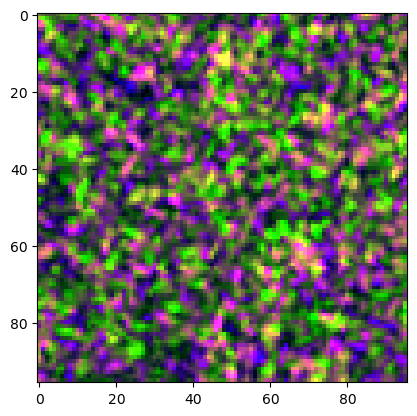

In [12]:
plt.imshow(create_s1_rgb_composite(s1_array))